In [34]:
import os
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from time import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [4]:
raw_df = pd.read_csv("heart.csv")
raw_df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [5]:
# Investigating data in dataframe
raw_df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

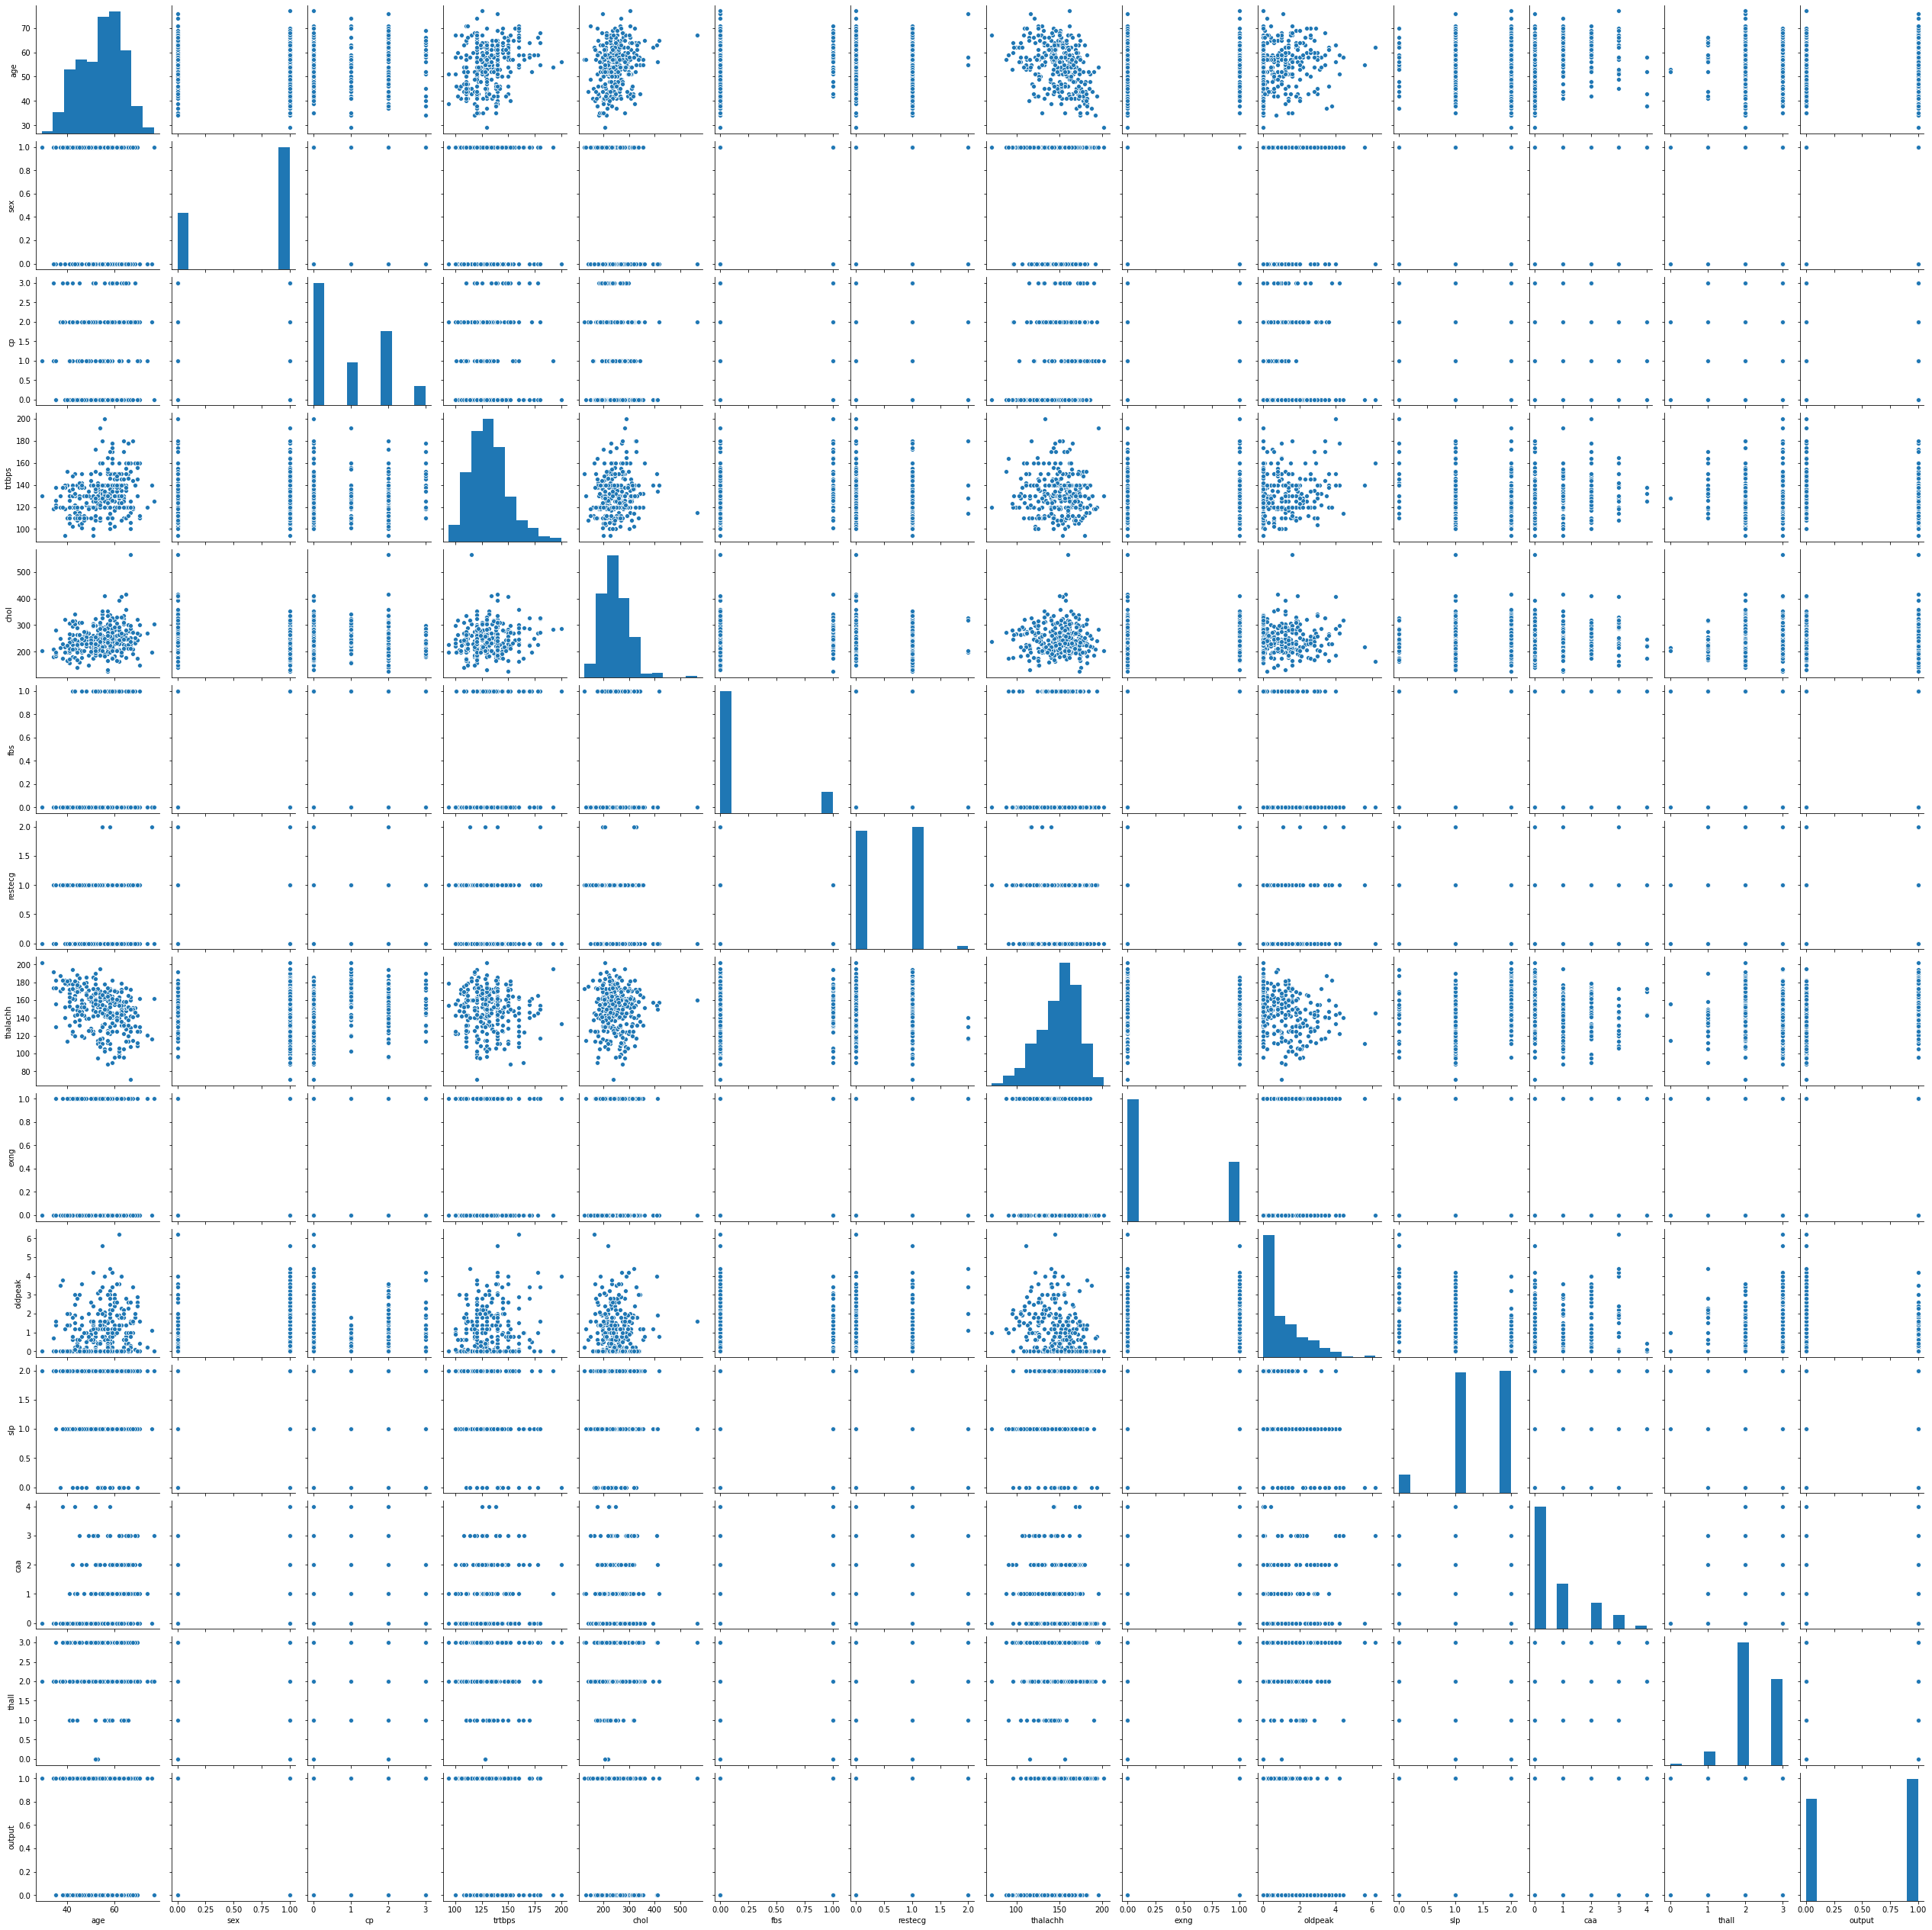

In [6]:
# Conducting some initial data exploration
sns.pairplot(raw_df)
plt.show()

In [8]:
target = raw_df['output']
features = raw_df.drop('output', axis = 1)



In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_minmax_transform = scaler.fit_transform(features)
features_minmax_transform

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

In [15]:
from sklearn.model_selection import train_test_split

# Spliting the data into training / testing data
X_train, X_test, y_train, y_test = train_test_split(features_minmax_transform, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 242 samples.
Testing set has 61 samples.


In [36]:
# Setting up model training and scoring pipeline
from sklearn.metrics import fbeta_score, accuracy_score
def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Train Model
    start = time()
    learner = learner.fit(X_train, y_train)
    end = time()     
    results['train_time'] = round(end - start,4)
        
    # Generate Predictions
    start = time() 
    predictions_test = learner.predict(X_test)
    end = time() 
    results['pred_time'] = round(end - start,4)
            
    # Compute Accuracy
    results['acc_test'] = round(accuracy_score(y_test,predictions_test), 4)
    results['f_test'] = round(fbeta_score(y_test, predictions_test, 0.5, average='micro'), 4)

    return results

In [37]:
# I'm testing three different models for this data: (1) Random Forest, (2) Naive Bayes (Gaussian), and (3) Support Vector Machine
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

mod_A = RandomForestClassifier(random_state=10)
mod_B = GaussianNB()
mod_C = SVC(random_state=10)

results = {}
for mod in [mod_A, mod_B, mod_C]:
    mod_name = mod.__class__.__name__
    results[mod_name] = train_predict(mod, X_train, y_train, X_test, y_test)

print(results)

{'RandomForestClassifier': {'train_time': 0.1781, 'pred_time': 0.014, 'acc_test': 0.8689, 'f_test': 0.8689}, 'GaussianNB': {'train_time': 0.001, 'pred_time': 0.0, 'acc_test': 0.8525, 'f_test': 0.8525}, 'SVC': {'train_time': 0.003, 'pred_time': 0.0, 'acc_test': 0.8361, 'f_test': 0.8361}}


In [44]:
# Random Forests seem to be a good predictor of the data 
# I'm going to tune the hyperparameters to see if I can improve the results
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import make_scorer

mod =  RandomForestClassifier(random_state=10)

parameters = {'n_estimators':[50,75,100, 125, 150],
              'criterion': ['gini', 'entropy'],
              'min_samples_split' : [1,2,3,4,5,6],
              'max_depth': [1,3, 5, 7, 9, 11, 13],
              'bootstrap' : [True, False],
              'min_samples_leaf' : [1, 2, 3]
             }

scorer = make_scorer(fbeta_score, beta=0.5)

grid_obj = GridSearchCV(mod, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)

best_mod = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (mod.fit(X_train, y_train)).predict(X_test)
best_predictions = best_mod.predict(X_test)

print("Unoptimized model\n------")
print(f"Accuracy score on testing data: {round(accuracy_score(y_test, predictions),4)}")
print(f"F-score on testing data: {round(fbeta_score(y_test, predictions, beta = 0.5),4)}")
print("\nOptimized Model\n------")
print(f"Final accuracy score on the testing data: {round(accuracy_score(y_test, best_predictions),4)}")
print(f"Final F-score on the testing data: {round(fbeta_score(y_test, best_predictions, beta = 0.5),4)}")
print(best_mod)

Unoptimized model
------
Accuracy score on testing data: 0.8689
F-score on testing data: 0.8824

Optimized Model
------
Final accuracy score on the testing data: 0.8525
Final F-score on the testing data: 0.8621
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=3,
                       n_estimators=75, random_state=10)
